In [ ]:
# Test 2-1 Dataset B
# This test uses a simple CNN to classify between having an Square or not

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-03-18 17:10:06.172774: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 17:10:06.172801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 17:10:06.173586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 17:10:06.180324: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 17:10:07.014265: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
train_dir = '../../Generator/Dataset_B/train'
test_dir = '../../Generator/Dataset_B/test'

In [6]:
IMG_SIZE = 500
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

726


In [7]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
    )

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


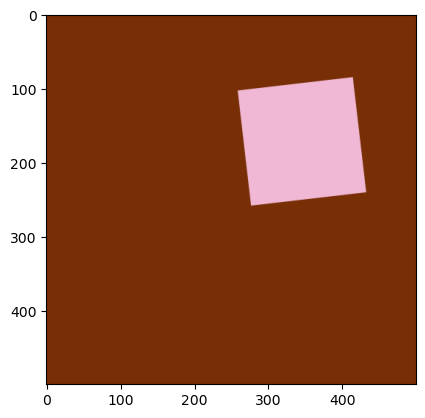

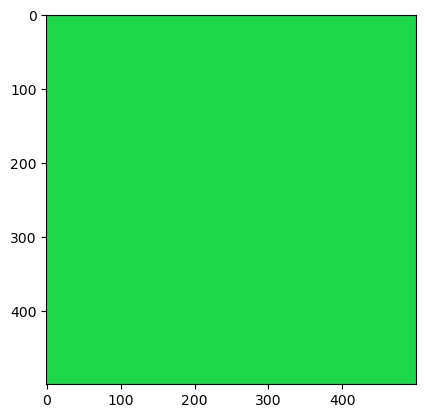

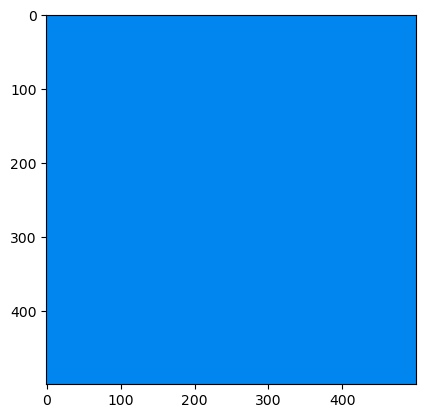

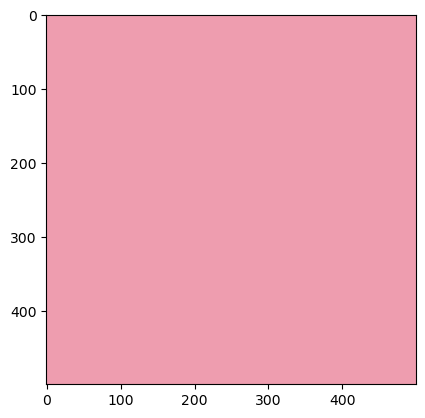

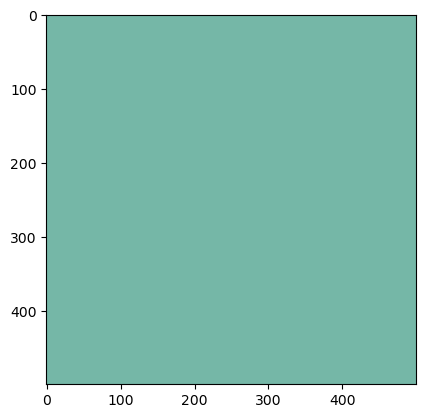

In [8]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [13]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [15]:
checkpoint_filepath = 'models/2-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)


In [16]:
#Best Epoch = loss: 0.0345 - acc: 0.9900 - val_loss: 0.0366 - val_acc: 0.9970

history = model.fit(train_dataset, epochs=15, batch_size=32, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/15


2024-03-18 17:12:46.841837: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-03-18 17:12:47.020792: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-18 17:12:47.945677: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-18 17:12:48.271875: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-18 17:12:49.722855: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fbe4c49db80 initiali

94/94 [==============================] - ETA: 0s - loss: 0.6871 - acc: 0.5490
Epoch 1: val_loss improved from inf to 0.71599, saving model to models/1-1/-001.ckpt
INFO:tensorflow:Assets written to: models/1-1/-001.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-001.ckpt/assets


94/94 [==============================] - 47s 388ms/step - loss: 0.6871 - acc: 0.5490 - val_loss: 0.7160 - val_acc: 0.5550
Epoch 2/15
94/94 [==============================] - ETA: 0s - loss: 0.6396 - acc: 0.6207
Epoch 2: val_loss improved from 0.71599 to 0.58322, saving model to models/1-1/-002.ckpt
INFO:tensorflow:Assets written to: models/1-1/-002.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-002.ckpt/assets


94/94 [==============================] - 27s 287ms/step - loss: 0.6396 - acc: 0.6207 - val_loss: 0.5832 - val_acc: 0.6940
Epoch 3/15
94/94 [==============================] - ETA: 0s - loss: 0.5846 - acc: 0.6830
Epoch 3: val_loss improved from 0.58322 to 0.55816, saving model to models/1-1/-003.ckpt
INFO:tensorflow:Assets written to: models/1-1/-003.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-003.ckpt/assets


94/94 [==============================] - 27s 290ms/step - loss: 0.5846 - acc: 0.6830 - val_loss: 0.5582 - val_acc: 0.7475
Epoch 4/15
94/94 [==============================] - ETA: 0s - loss: 0.5327 - acc: 0.7360
Epoch 4: val_loss improved from 0.55816 to 0.51156, saving model to models/1-1/-004.ckpt
INFO:tensorflow:Assets written to: models/1-1/-004.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-004.ckpt/assets


94/94 [==============================] - 28s 294ms/step - loss: 0.5327 - acc: 0.7360 - val_loss: 0.5116 - val_acc: 0.8065
Epoch 5/15
94/94 [==============================] - ETA: 0s - loss: 0.4669 - acc: 0.7987
Epoch 5: val_loss improved from 0.51156 to 0.42974, saving model to models/1-1/-005.ckpt
INFO:tensorflow:Assets written to: models/1-1/-005.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-005.ckpt/assets


94/94 [==============================] - 28s 294ms/step - loss: 0.4669 - acc: 0.7987 - val_loss: 0.4297 - val_acc: 0.7190
Epoch 6/15
94/94 [==============================] - ETA: 0s - loss: 0.3525 - acc: 0.8617
Epoch 6: val_loss improved from 0.42974 to 0.35102, saving model to models/1-1/-006.ckpt
INFO:tensorflow:Assets written to: models/1-1/-006.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-006.ckpt/assets


94/94 [==============================] - 28s 297ms/step - loss: 0.3525 - acc: 0.8617 - val_loss: 0.3510 - val_acc: 0.8655
Epoch 7/15
94/94 [==============================] - ETA: 0s - loss: 0.2516 - acc: 0.9183
Epoch 7: val_loss improved from 0.35102 to 0.22158, saving model to models/1-1/-007.ckpt
INFO:tensorflow:Assets written to: models/1-1/-007.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-007.ckpt/assets


94/94 [==============================] - 28s 294ms/step - loss: 0.2516 - acc: 0.9183 - val_loss: 0.2216 - val_acc: 0.9270
Epoch 8/15
94/94 [==============================] - ETA: 0s - loss: 0.1676 - acc: 0.9533
Epoch 8: val_loss improved from 0.22158 to 0.10788, saving model to models/1-1/-008.ckpt
INFO:tensorflow:Assets written to: models/1-1/-008.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-008.ckpt/assets


94/94 [==============================] - 28s 297ms/step - loss: 0.1676 - acc: 0.9533 - val_loss: 0.1079 - val_acc: 0.9765
Epoch 9/15
94/94 [==============================] - ETA: 0s - loss: 0.0906 - acc: 0.9757
Epoch 9: val_loss improved from 0.10788 to 0.09025, saving model to models/1-1/-009.ckpt
INFO:tensorflow:Assets written to: models/1-1/-009.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-009.ckpt/assets


94/94 [==============================] - 28s 293ms/step - loss: 0.0906 - acc: 0.9757 - val_loss: 0.0903 - val_acc: 0.9885
Epoch 10/15
94/94 [==============================] - ETA: 0s - loss: 0.0589 - acc: 0.9843
Epoch 10: val_loss improved from 0.09025 to 0.04043, saving model to models/1-1/-010.ckpt
INFO:tensorflow:Assets written to: models/1-1/-010.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-010.ckpt/assets


94/94 [==============================] - 28s 296ms/step - loss: 0.0589 - acc: 0.9843 - val_loss: 0.0404 - val_acc: 0.9855
Epoch 11/15
94/94 [==============================] - ETA: 0s - loss: 0.0551 - acc: 0.9843
Epoch 11: val_loss improved from 0.04043 to 0.02818, saving model to models/1-1/-011.ckpt
INFO:tensorflow:Assets written to: models/1-1/-011.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/-011.ckpt/assets


94/94 [==============================] - 28s 298ms/step - loss: 0.0551 - acc: 0.9843 - val_loss: 0.0282 - val_acc: 0.9950
Epoch 12/15
94/94 [==============================] - ETA: 0s - loss: 0.0329 - acc: 0.9907
Epoch 12: val_loss did not improve from 0.02818
94/94 [==============================] - 27s 281ms/step - loss: 0.0329 - acc: 0.9907 - val_loss: 0.0481 - val_acc: 0.9860
Epoch 13/15
94/94 [==============================] - ETA: 0s - loss: 0.0545 - acc: 0.9840
Epoch 13: val_loss did not improve from 0.02818
94/94 [==============================] - 26s 275ms/step - loss: 0.0545 - acc: 0.9840 - val_loss: 0.0620 - val_acc: 0.9825
Epoch 14/15
94/94 [==============================] - ETA: 0s - loss: 0.0345 - acc: 0.9900
Epoch 14: val_loss did not improve from 0.02818
94/94 [==============================] - 26s 276ms/step - loss: 0.0345 - acc: 0.9900 - val_loss: 0.0366 - val_acc: 0.9970
Epoch 15/15
94/94 [==============================] - ETA: 0s - loss: 0.0357 - acc: 0.9893
Epoch 15

INFO:tensorflow:Assets written to: models/1-1/-015.ckpt/assets


94/94 [==============================] - 28s 297ms/step - loss: 0.0357 - acc: 0.9893 - val_loss: 0.0252 - val_acc: 0.9910


In [17]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

63/63 [==============================] - 7s 104ms/step - loss: 0.0252 - acc: 0.9910
0.02517746575176716 0.9909999966621399


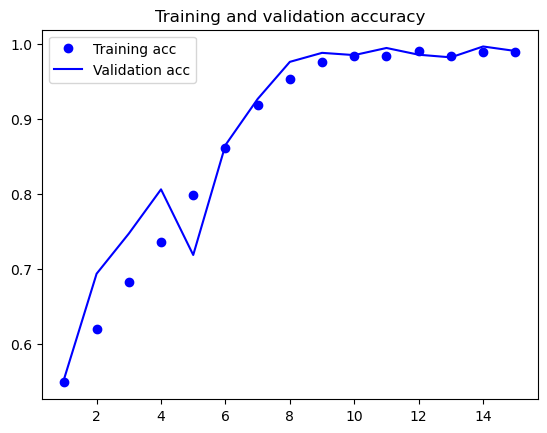

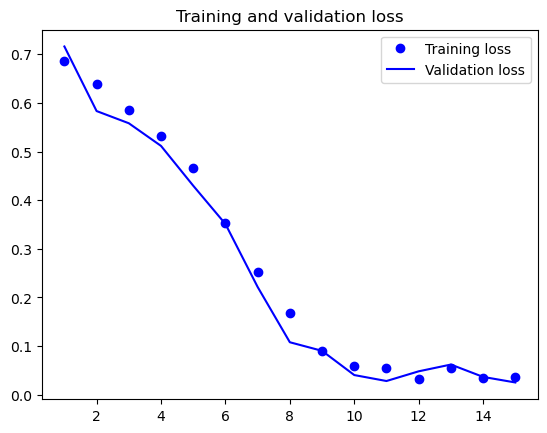

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/train_test_acc",dpi=100)
plt.show()


In [26]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/square/square_309.png', target_size=(IMG_SIZE, IMG_SIZE))

In [29]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/none/none_1.png', target_size=(IMG_SIZE, IMG_SIZE))

In [30]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

(1, 500, 500, 3)
1/1 [==============================] - 0s 27ms/step
Result:  [[0.]]
